Keys of faces dataset: dict_keys(['data', 'images', 'target', 'DESCR'])

Data shape (n_samples, n_features): (400, 4096)
Images shape: (400, 64, 64)
Target shape: (400,)

Dataset description:
 .. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous backgrou

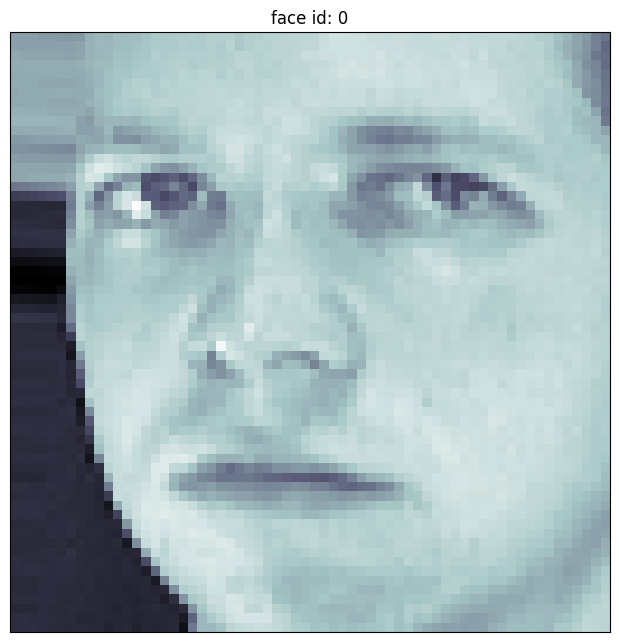

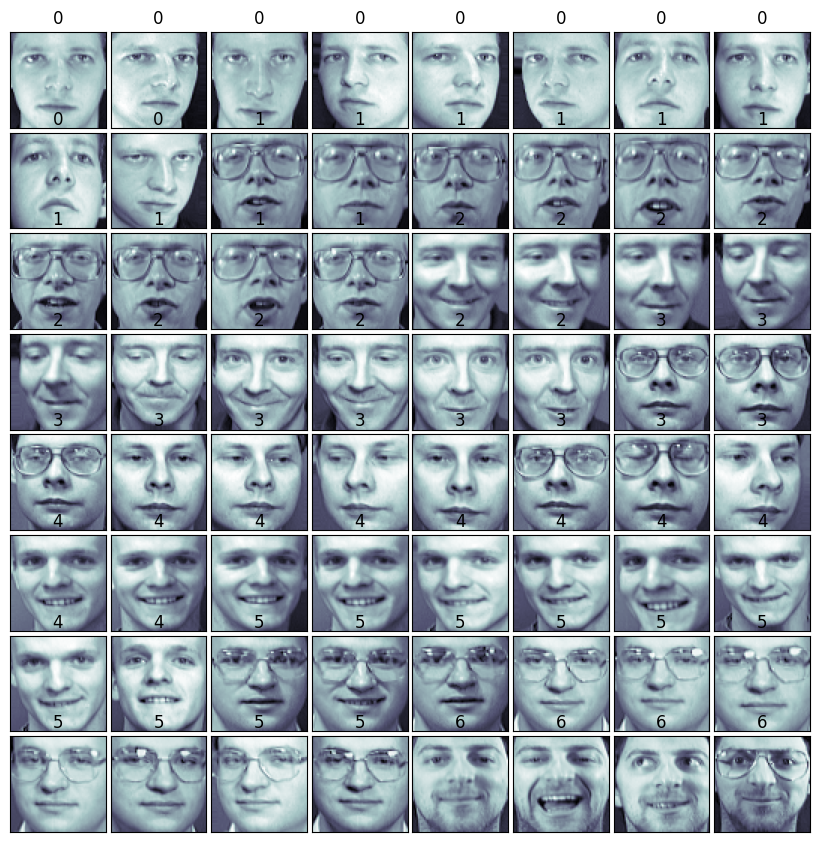

In [4]:

#Activity 1
# 1. Import libraries
# -----------------------------
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------
# 2. Load the dataset
# -----------------------------
faces = fetch_olivetti_faces()  # downloads the dataset if not already available

# Check the keys in the returned Bunch object
print("Keys of faces dataset:", faces.keys())

# -----------------------------
# 3. Examine the data structure
# -----------------------------
# faces.data   -> 2D array of shape (n_samples, n_features)
# faces.images -> 3D array of shape (n_samples, image_height, image_width)
# faces.target -> 1D array of shape (n_samples,)
# faces.DESCR  -> Description of the dataset

n_samples, n_features = faces.data.shape
print("\nData shape (n_samples, n_features):", (n_samples, n_features))
print("Images shape:", faces.images.shape)
print("Target shape:", faces.target.shape)
print("\nDataset description:\n", faces.DESCR)

# -----------------------------
# 4. Assign X and y
# -----------------------------
X = faces.data
y = faces.target

# -----------------------------
# 5. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("\nAfter train_test_split:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# -----------------------------
# 6. Plot a single image example
# -----------------------------
fig = plt.figure(figsize=(6, 6))  # figure size in inches
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Display the image at index 5
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(faces.images[5], cmap=plt.cm.bone)
ax.set_title(f"face id: {faces.target[5]}")

plt.show()

# -----------------------------
# 7. Plot multiple images
# -----------------------------
# Example: plot the first 64 images in an 8x8 grid
fig = plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
    # Label the image with its target value
    ax.set_title(str(faces.target[i]))

plt.show()


Keys of digits dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Shape of 'data': (1797, 64)
Shape of 'images': (1797, 8, 8)
Shape of 'target': (1797,)


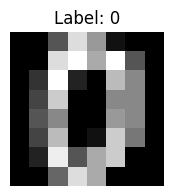

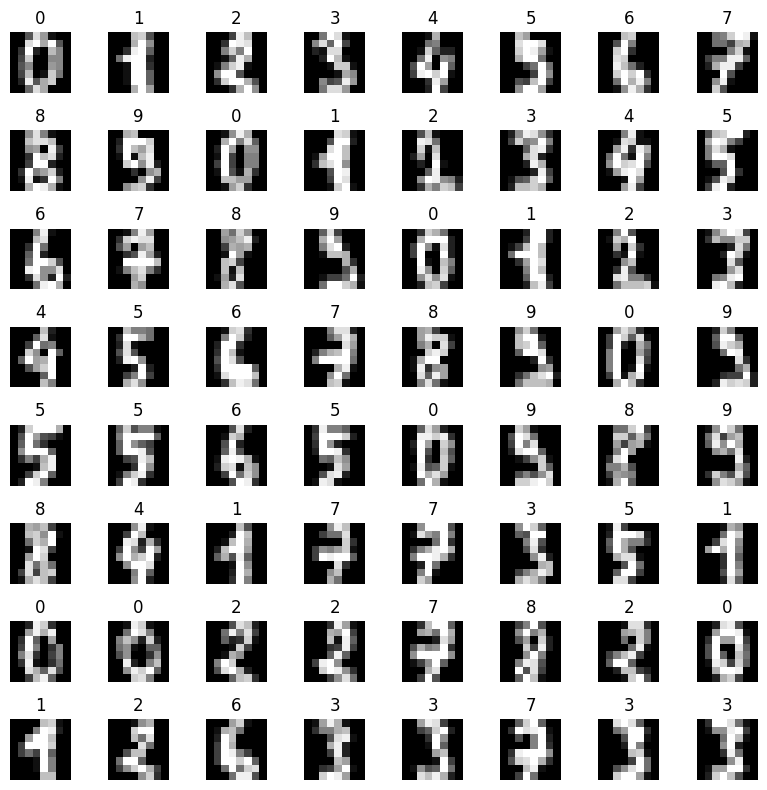


After train_test_split:
X_train shape: (1257, 64)
y_train shape: (1257,)
X_test shape: (540, 64)
y_test shape: (540,)


In [24]:

# Activity 2: Working with the Digits Dataset
#loading digits dataset

# 1. Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# 2. Load the Digits dataset
digits = load_digits()

# 3. Explore the dataset structure
# The returned "Bunch" object has keys such as 'data', 'target', 'images', 'DESCR'
print("Keys of digits dataset:", digits.keys())
print("\nShape of 'data':", digits.data.shape)    # 2D array of features
print("Shape of 'images':", digits.images.shape)  # 3D array of images (n_samples, 8, 8)
print("Shape of 'target':", digits.target.shape)  # 1D array of labels

# 4. Convert dataset into X and y
X = digits.data    # Flattened pixel data, shape = (n_samples, 64)
y = digits.target  # Digit labels, shape = (n_samples,)

# 5. Display a single image (for example, the first image)
plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.axis('off')  # Hide axis ticks
plt.show()

# 6. Display the first 64 images with their labels
plt.figure(figsize=(8, 8))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(str(digits.target[i]))
    ax.axis('off')  # Hide axis ticks
plt.tight_layout()
plt.show()

# 7. Perform train-test split
#    By default, this randomly splits X and y into training and test sets.
#    We can control the random seed with random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print("\nAfter train_test_split:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


(1797, 64)


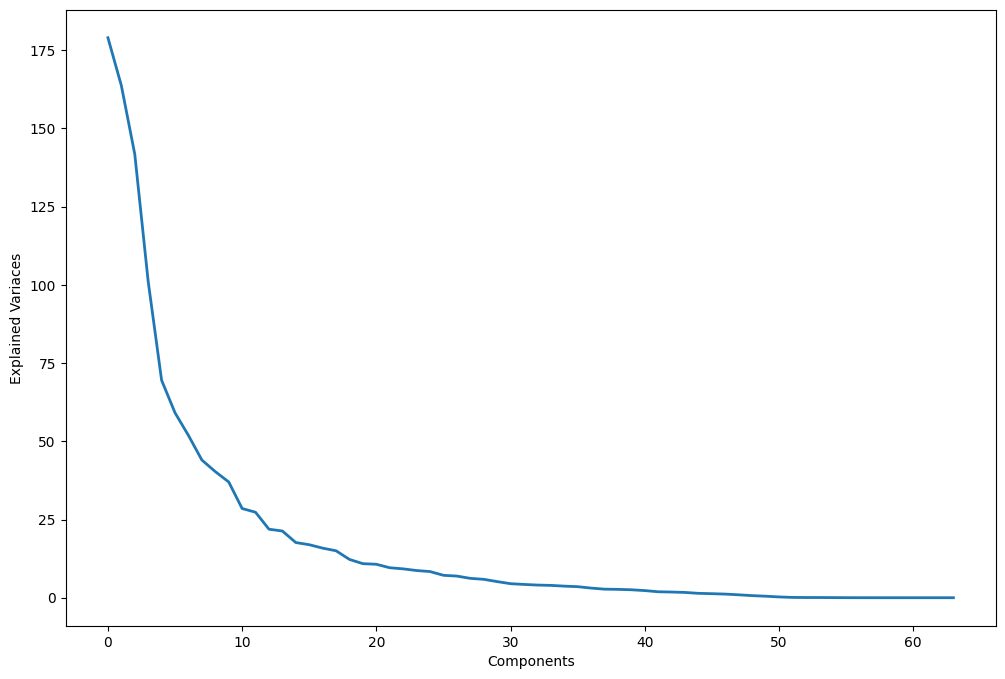

In [7]:
#Reducing features(Dimensionally Reduction)PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
X_pca=pca.transform(X)
print(X_pca.shape)
plt.figure(1,figsize=(12,8))
plt.plot(pca.explained_variance_,linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()



(400, 90)


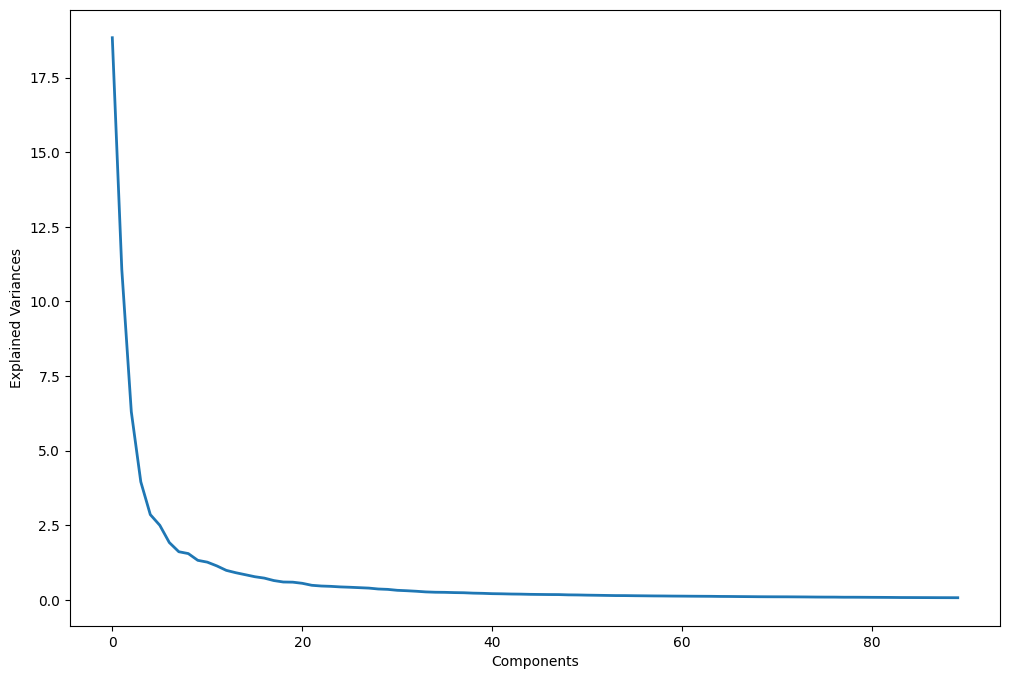

In [27]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

faces = fetch_olivetti_faces()
X = faces.data  # shape (400, 4096)

n_components = 90
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

print(X_pca.shape)

plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()


pca.mean_.shape: (4096,)


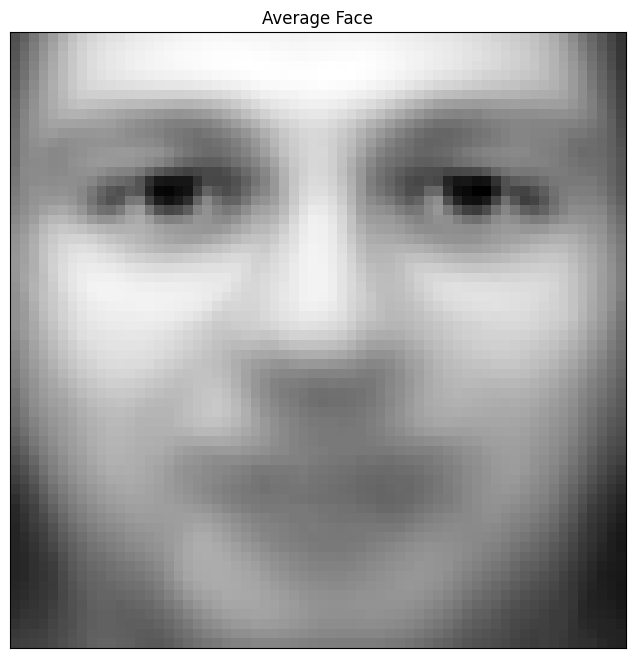

In [13]:
#Average Faces
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

# 1. Load the Olivetti faces dataset
faces = fetch_olivetti_faces()
X = faces.data  # shape = (n_samples, 64*64)

# 2. Fit PCA
n_components = 30
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)

# 3. Print the shape of the mean_
print("pca.mean_.shape:", pca.mean_.shape)

# 4. Display the "average face"
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Average Face")
plt.show()



In [14]:
#Activity 4
#Reduce features of Digits Dataset using PCA
#Using dataframe for dataset
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot
dataset=pandas.DataFrame({'Height': [165, 175, 136, 174, 141, 176, 131, 166, 128, 179, 136, 186, 126, 176, 112, 169, 171, 116, 196, 196, 126, 197, 150, 140, 136],
'Hair Length': [19, 32, 35, 65, 28, 15, 32, 6, 32, 10, 34, 2, 25, 28, 38, 9, 36, 25, 25, 38, 40, 20, 25, 32, 35],
 'Gender':['Man', 'Woman', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Woman', 'Woman', 'Man', 'Woman', 'Woman', 'Man', 'Woman', 'Woman', 'Man', 'Man', 'Woman', 'Woman']})
print(dataset)
features=['Height','Hair Length']
X = dataset[features]
y = dataset['Gender']
print(X.shape)
print(y.shape)
print(dataset.describe())
print(dataset.groupby('Gender').size())




    Height  Hair Length Gender
0      165           19    Man
1      175           32  Woman
2      136           35  Woman
3      174           65    Man
4      141           28  Woman
5      176           15    Man
6      131           32  Woman
7      166            6    Man
8      128           32  Woman
9      179           10    Man
10     136           34  Woman
11     186            2    Man
12     126           25  Woman
13     176           28  Woman
14     112           38  Woman
15     169            9    Man
16     171           36  Woman
17     116           25  Woman
18     196           25    Man
19     196           38  Woman
20     126           40  Woman
21     197           20    Man
22     150           25    Man
23     140           32  Woman
24     136           35  Woman
(25, 2)
(25,)
           Height  Hair Length
count   25.000000    25.000000
mean   156.160000    27.440000
std     26.482195    13.169029
min    112.000000     2.000000
25%    136.000000    20.0

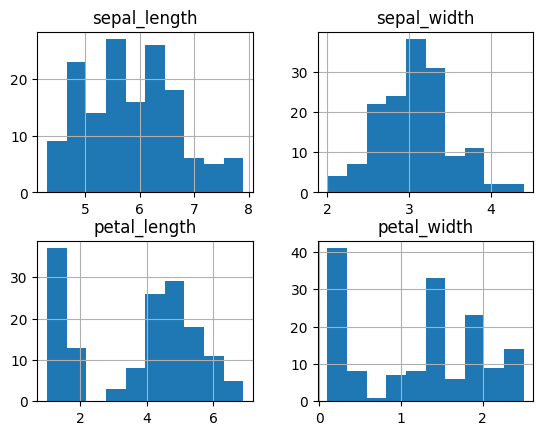

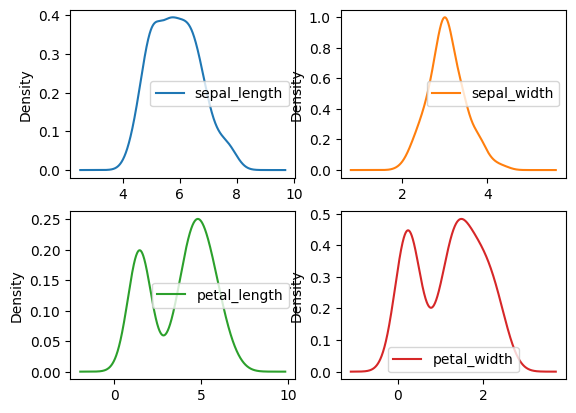

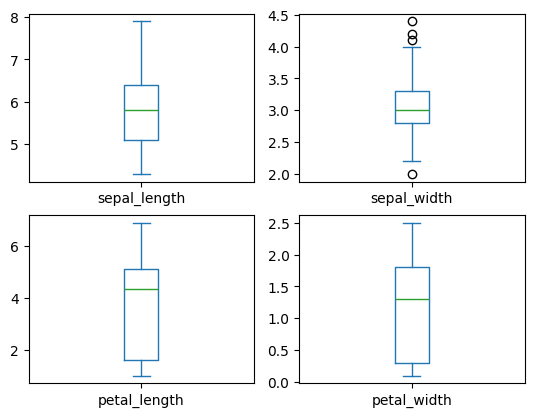

In [15]:
#Visual Data Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load some data into a DataFrame
# (Replace this with your own dataset source)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
# iris.csv has 5 columns: sepal_length, sepal_width, petal_length, petal_width, class
# Let's name them properly
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names=column_names)

# -------------------------
# 1) Histograms
# -------------------------
dataset.hist()
plt.show()

# -------------------------
# 2) Density Plots
#    (Typically, you'd specify kind='density' to see
#    kernel density estimates for each numeric column)
# -------------------------
dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# -------------------------
# 3) Box & Whisker Plots
# -------------------------
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()



Encoded DataFrame:
     Windy  Outlook_Rainy  Outlook_Sunny  Temperature_hot  Temperature_mild  \
0       0              0              1                1                 0   
1       1              0              1                1                 0   
2       0              0              0                1                 0   
3       0              1              0                0                 1   
4       0              1              0                0                 0   
5       1              1              0                0                 0   
6       1              0              0                0                 0   
7       0              0              1                0                 1   
8       0              0              1                0                 0   
9       0              1              0                0                 1   
10      1              0              1                0                 1   
11      1              0              0    

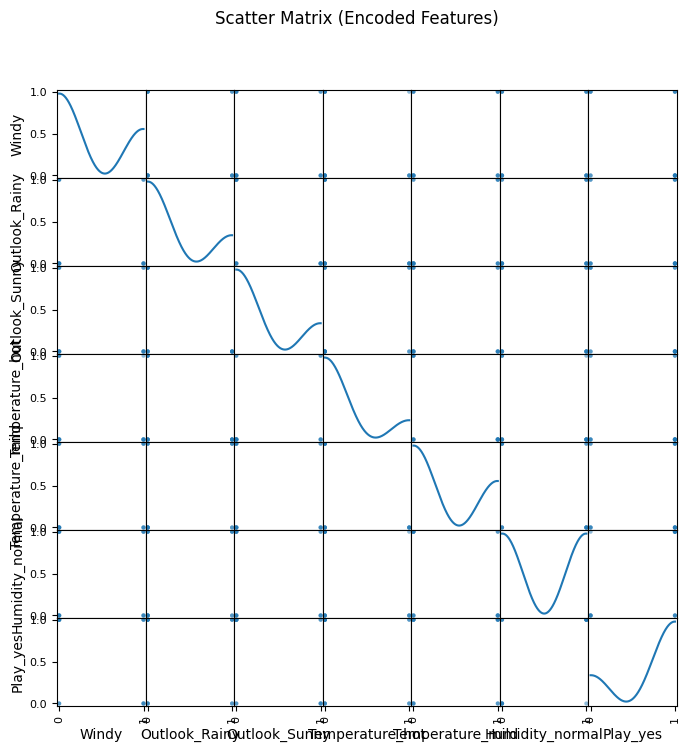

In [18]:
#ACtivity 6
#Artificial /Synthetic data
#Normally Distributed data
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

data = {
    "Outlook": [
        "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast",
        "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"
    ],
    "Temperature": [
        "hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild",
        "cool", "mild", "mild", "mild", "hot", "mild"
    ],
    "Humidity": [
        "high", "high", "high", "high", "normal", "normal", "normal",
        "high", "normal", "normal", "normal", "high", "normal", "high"
    ],
    "Windy": [
        False, True, False, False, False, True, True, False,
        False, False, True, True, False, True
    ],
    "Play": [
        "no", "no", "yes", "yes", "yes", "no", "yes", "no",
        "yes", "yes", "yes", "yes", "yes", "no"
    ]
}

df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, drop_first=True)

# Convert any remaining boolean columns (or all columns) to int
df_encoded = df_encoded.astype(int)

print("\nEncoded DataFrame:\n", df_encoded)

# Now scatter_matrix will work correctly because all columns are numeric
scatter_matrix(df_encoded, figsize=(8, 8), diagonal='kde')
plt.suptitle("Scatter Matrix (Encoded Features)")
plt.show()


In [19]:
#Activity 7
import numpy as np
import pandas as pd

# ------------------------------------
# 1) Define the city-specific parameters
# ------------------------------------
# For each city, we store mean and std for temperature, humidity, and wind
city_params = {
    "Karachi":   {"temp_mean": 27, "temp_std": 2, "humid_mean": 70, "humid_std": 5, "wind_mean": 20, "wind_std": 3},
    "Lahore":    {"temp_mean": 24, "temp_std": 2, "humid_mean": 60, "humid_std": 4, "wind_mean": 15, "wind_std": 2},
    "Islamabad": {"temp_mean": 22, "temp_std": 2, "humid_mean": 50, "humid_std": 3, "wind_mean": 10, "wind_std": 2},
    "Rawalpindi":{"temp_mean": 21, "temp_std": 2, "humid_mean": 45, "humid_std": 3, "wind_mean":  8, "wind_std": 1},
    "Multan":    {"temp_mean": 28, "temp_std": 2, "humid_mean": 55, "humid_std": 4, "wind_mean": 12, "wind_std": 2},
}

# ------------------------------------
# 2) Generate random data for each city
# ------------------------------------
num_samples = 250  # for each city
df_list = []

for city, params in city_params.items():
    # Generate normally distributed random values
    temperature = np.random.normal(params["temp_mean"],   params["temp_std"],   num_samples)
    humidity    = np.random.normal(params["humid_mean"], params["humid_std"],  num_samples)
    wind        = np.random.normal(params["wind_mean"],   params["wind_std"],   num_samples)

    # Create a temporary DataFrame for this city
    city_df = pd.DataFrame({
        "Temperature": temperature,
        "Humidity":    humidity,
        "Wind":        wind,
        "City":        city
    })
    df_list.append(city_df)

# ------------------------------------
# 3) Combine all city DataFrames
# ------------------------------------
df = pd.concat(df_list, ignore_index=True)

# ------------------------------------
# 4) Quick checks on the resulting DataFrame
# ------------------------------------
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nShape of the combined DataFrame:", df.shape)
print("\nNumber of rows per city:\n", df["City"].value_counts())

# (Optional) Show summary statistics
print("\nDescriptive statistics:\n", df.describe())


First 5 rows:
    Temperature   Humidity       Wind     City
0    25.342311  70.261466  24.155556  Karachi
1    24.777931  67.884864  17.570281  Karachi
2    29.056051  71.494171  22.090225  Karachi
3    26.646604  68.999977  22.768565  Karachi
4    27.829574  72.427879  15.878779  Karachi

Last 5 rows:
       Temperature   Humidity       Wind    City
1245    28.967786  54.915388  12.653456  Multan
1246    25.049468  51.075394  11.659706  Multan
1247    24.846708  63.490771  10.242234  Multan
1248    29.817947  60.086300  11.319780  Multan
1249    30.425975  60.460978   7.924561  Multan

Shape of the combined DataFrame: (1250, 4)

Number of rows per city:
 City
Karachi       250
Lahore        250
Islamabad     250
Rawalpindi    250
Multan        250
Name: count, dtype: int64

Descriptive statistics:
        Temperature     Humidity         Wind
count  1250.000000  1250.000000  1250.000000
mean     24.356138    56.068644    13.028433
std       3.295821     9.450813     4.610897
min     

Original data shape: (1797, 64)
Transformed data shape with 10 components: (1797, 10)
Explained variance ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806]
Total explained variance (sum): 0.7382267688459531


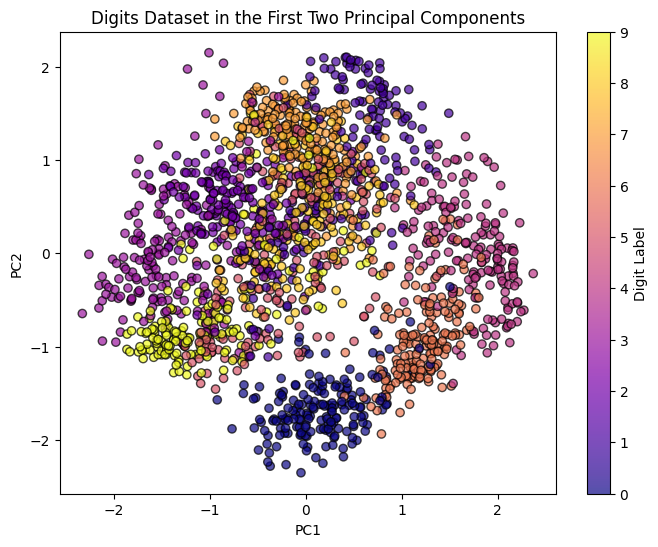

In [23]:
#Activity 4
#Reduce features of digits dataset using PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # shape (n_samples, 64)
y = digits.target

print("Original data shape:", X.shape)  # e.g. (1797, 64)

# 2. Initialize and fit PCA
#    Choose how many components to keep, e.g. 10
n_components = 10
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)

# 3. Transform the data using PCA
X_pca = pca.transform(X)
print(f"Transformed data shape with {n_components} components:", X_pca.shape)

# 4. Inspect explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance (sum):", np.sum(pca.explained_variance_ratio_))

# 5. (Optional) Plot the data in the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolor='k', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits Dataset in the First Two Principal Components")
plt.colorbar(label="Digit Label")
plt.show()



Keys of digits dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Shape of 'data': (1797, 64)
Shape of 'images': (1797, 8, 8)
Shape of 'target': (1797,)


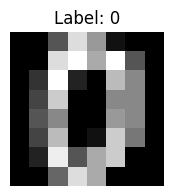

In [25]:

# Activity 2: Working with the Digits Dataset
#loading digits dataset

# 1. Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# 2. Load the Digits dataset
digits = load_digits()

# 3. Explore the dataset structure
# The returned "Bunch" object has keys such as 'data', 'target', 'images', 'DESCR'
print("Keys of digits dataset:", digits.keys())
print("\nShape of 'data':", digits.data.shape)    # 2D array of features
print("Shape of 'images':", digits.images.shape)  # 3D array of images (n_samples, 8, 8)
print("Shape of 'target':", digits.target.shape)  # 1D array of labels

# 4. Convert dataset into X and y
X = digits.data    # Flattened pixel data, shape = (n_samples, 64)
y = digits.target  # Digit labels, shape = (n_samples,)

# 5. Display a single image (for example, the first image)
plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.axis('off')  # Hide axis ticks
plt.show()